# Software Evolution - Practical Session
## Laws of software evolution, code counting, code duplication and dependency analysis
## Academic year 2022-2023

### Write your answers under the questions that are present in this notebook  

### Read Section 1 and Section 2 in the provided description document before proceeding with the following section 

In [23]:
import os
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import math
from pandas import option_context
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## 2. Verifying laws of software evolution

In [31]:
#Enter the path where the Eucalyptus project is present
project_path = '../eucalyptus/'

### 2.1 Data prepocessing
1. Get all the tags present in the eucalyptus project using CLOC
2. Filter out the tags that do not correspond to official releases

Code hint:  
To get the tags that are present in the project - "command = f'git -C {project_path} tag -l --format="%(refname:short)" | sort -r'"   
To read the terminal output - 'process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)'

In [25]:
command = f'git -C {project_path} tag -l --format="%(refname:short)" | sort -r'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
all_tags = list(line.strip().decode("utf-8") for line in process.stdout)
print(all_tags)

['v4.4.2', 'v4.4.1', 'v4.4.0', 'v4.3.1.1', 'v4.3.1', 'v4.3.0.1', 'v4.3.0', 'v4.2.2', 'v4.2.1', 'v4.2.0', 'v4.1.2', 'v4.1.1', 'v4.1.0', 'v4.0.2', 'v4.0.1', 'v4.0.0', 'karmic', 'jaunty', 'ha-baseline', '3.4.2', '3.4.1', '3.4.0', '3.3.2', '3.3.1', '3.3.0.1', '3.3.0', '3.3-m6', '3.3-m5', '3.3-m4', '3.3-m3', '3.3-m2', '3.3-m1', '3.2.2', '3.2.1', '3.2.0', '3.1.2', '3.1.1', '3.1.0', '3.1-beta1', '3.1-alpha2', '3.0.1', '3.0.0', '3.0-rc3', '3.0-rc2', '3.0-rc1', '3.0-beta6', '3.0-beta5', '3.0-beta4', '3.0-beta3', '3.0-beta2', '3.0-alpha1', '2.0.1', '2.0.0', '2.0-branch', '2.0-beta', '1.6.1', '1.5.2', '1.5.1', '1.5.0', '1.4', '1.0-beta']


In [26]:
# Your tag filtering code here
major_minor_patch_versions = ['1.4','1.5.0','1.5.1','1.5.2','1.6.1','2.0.0','2.0.1','3.0.0','3.0.1','3.1.0','3.1.1','3.1.2','3.2.0','3.2.1',
                              '3.2.2','3.3.0','3.3.1','3.3.2','3.4.0','3.4.1','3.4.2','v4.0.0','v4.0.1','v4.0.2','v4.1.0','v4.1.1','v4.1.2',
                              'v4.2.0','v4.2.1','v4.2.2','v4.3.0','v4.3.1','v4.4.0','v4.4.1','v4.4.2']
major_minor_versions = ['1.4','1.5.0','1.6.1','2.0.0','3.0.0','3.1.0','3.2.0','3.3.0','3.4.0','v4.0.0','v4.1.0','v4.2.0','v4.3.0','v4.4.0']

### 2.2 Law of Increasing Growth
1. Fetch the required data (lines of code, blank lines, comment lines and number of files) for each tag along with their release date using CLOC
2. Separate the data as following (also mentioned in section 2.1 of the description document)  
    a) Consider all the three-component versions (major.minor.patch) - Dataset A  
    b) Consider only the minor versions (major.minor) - Dataset B  

Note: For example, if there exists any tag like 2.1.0.1, then you can consider it as 2.1.0 provided such a tag does not exist in the data. If both 2.1.0 and 2.1.0.1 exists, then you can ignore the latter 

Code hint:  
To set the project to a required tag - "command = f'git -C {project_path} reset --hard {tag}'"  
For each tag, pass the command to the terminal, invoke cloc tool to get the necessary data in the required format (json, md,...), read the terminal output and store the data

In [27]:
for tag in major_minor_patch_versions:
    command = f'git -C {project_path} reset --hard {tag}'
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    print(f"Reset to {tag} done")
    cloc_command = f'cloc {project_path} --json'
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    output = process.communicate()[0].decode("utf-8")
    print(output)

#Does not work on my machine (Mac M1)
    

Reset to 1.4 done


fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.


HEAD is now at 7183c5b286 from CVS

Reset to 1.5.0 done

Reset to 1.5.1 done

Reset to 1.5.2 done

Reset to 1.6.1 done

Reset to 2.0.0 done

Reset to 2.0.1 done

Reset to 3.0.0 done

Reset to 3.0.1 done

Reset to 3.1.0 done

Reset to 3.1.1 done

Reset to 3.1.2 done

Reset to 3.2.0 done

Reset to 3.2.1 done


fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git


Reset to 3.2.2 done

Reset to 3.3.0 done

Reset to 3.3.1 done

Reset to 3.3.2 done

Reset to 3.4.0 done

Reset to 3.4.1 done

Reset to 3.4.2 done

Reset to v4.0.0 done

Reset to v4.0.1 done

Reset to v4.0.2 done

Reset to v4.1.0 done

Reset to v4.1.1 done

Reset to v4.1.2 done


fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git


Reset to v4.2.0 done

Reset to v4.2.1 done

Reset to v4.2.2 done

Reset to v4.3.0 done

Reset to v4.3.1 done

Reset to v4.4.0 done

Reset to v4.4.1 done

Reset to v4.4.2 done



fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
fatal: Unable to create '/Users/hugo/MASTER_I/Q2/SOFTWARE_EVOLUTION/TP/LAB2/eucalyptus/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git

In [28]:
command = f'git -C {project_path} tag -l --format="%(refname:short)|%(creatordate:short)" | sort -r' # to get the release date
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
# Your code to obtain the release date of each tag and combine it with the data obtained in the previous cell. Final data should have
# #lines of code, #comments, #files, #blanks, #release date

NameError: name 'project_path' is not defined

Updating files: 100% (4854/4854), done.


In [ ]:
# Your code here to get the versions of the form major.minor 

In [ ]:
# Your code here to get the versions of the form major.minor.patch

#### Visualization
1. x-axis = version, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

2. x-axis = date, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

For easy comparison, place the plots with the versions on x-axis should be on the top (0,0) and (1,0) and their corresponding plots with date on the x-axis right below them (1,0) and (1,1) 

<AxesSubplot:title={'center':'Number of files'}, xlabel='major.minor'>

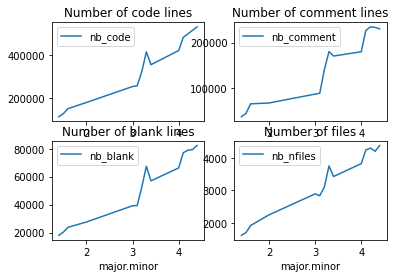

In [ ]:
fig,axes = plt.subplots(2,2)

df = pd.read_csv('LIG_major_minor.csv', index_col=0)
#df2 = pd.read_csv('LIG_major_minor_patch.csv', index_col=0)

df.plot(x='major.minor', y='nb_code', ax=axes[0,0], title='Number of code lines')
df.plot(x='major.minor', y='nb_comment', ax=axes[0,1], title='Number of comment lines')
df.plot(x='major.minor', y='nb_blank', ax=axes[1,0], title='Number of blank lines')
df.plot(x='major.minor', y='nb_nfiles', ax=axes[1,1], title='Number of files')


<AxesSubplot:title={'center':'Number of files'}, xlabel='major.minor.patch'>

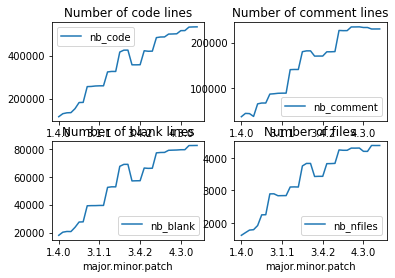

In [ ]:
fig,axes = plt.subplots(2,2)

#df = pd.read_csv('LIG_major_minor.csv', index_col=0)
df = pd.read_csv('LIG_major_minor_patch.csv', index_col=0)

df.plot(x='major.minor.patch', y='nb_code', ax=axes[0,0], title='Number of code lines')
df.plot(x='major.minor.patch', y='nb_comment', ax=axes[0,1], title='Number of comment lines')
df.plot(x='major.minor.patch', y='nb_blank', ax=axes[1,0], title='Number of blank lines')
df.plot(x='major.minor.patch', y='nb_nfiles', ax=axes[1,1], title='Number of files')


### Questions:
1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

the only difference is that we are not checking the same thing, so the results are different. In the first case we are checking the date, which can have a big difference between two pushs, and the tags, where the difference is smaller.

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

The date in x-axis is preferable because it is more accurate and we can see the evolution of the project more clearly

3. Choose an option regarding the growth of the software by considering Dataset A. Motivate your choice using a 1d regression plot (below).  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

it is linear

<AxesSubplot:xlabel='relative_day', ylabel='nb_nfiles'>

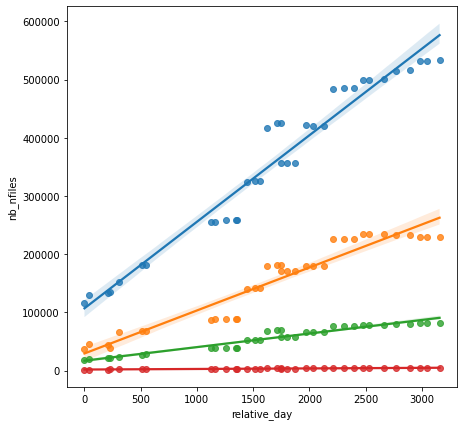

In [ ]:
plt.figure(figsize=(7,7))
# Your code for regression plot

import seaborn as sns
sns.regplot(x='relative_day', y='nb_code', data=df)
sns.regplot(x='relative_day', y='nb_comment', data=df)
sns.regplot(x='relative_day', y='nb_blank', data=df)
sns.regplot(x='relative_day', y='nb_nfiles', data=df)



### Correlation 
Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering Dataset A. Report the correlation upto 3 decimal places

In [ ]:
spearman_corr = df['nb_code'].corr(df['nb_nfiles'], method='spearman')
pearson_corr = df['nb_code'].corr(df['nb_nfiles'], method='pearson')
print(f"Spearman correlation: {spearman_corr:.3f}")
print(f"Pearson correlation: {pearson_corr:.3f}")


Spearman correlation: 0.977
Pearson correlation: 0.993


### Questions:
4. Do you find any difference in correlation values between Pearson and Spearman? Which one is preferable for this use case? why?

There is a difference between the two correlation values, but the difference is not very big. The pearson correlation is preferable because it is more accurate.

5. Based on the above correlation value, how much is the number of lines of code related to the number of files?

Based on the correlation value, the number of lines of code is not related to the number of files 0.993.

### Prediction
Consider Dataset A for this task. Drop the last two data points in "number of lines of code" (LOC) (i.e. drop (LOC) corresponding to v4.4.1 and v4.4.2) and forecast the values for (LOC) for v4.4.1 and v4.4.2 using a basic linear/polynimial regression model.
1. Drop the last two data points
2. Build a basic regression model
3. Ask the model to forecast the next two data points
4. Plot the LOC original and forecasted in the same plot. x-axis = date, y-axis = number of lines of code

In [ ]:
# Your code here
#Drop the last two data points
df = df.drop(df.index[-2:])

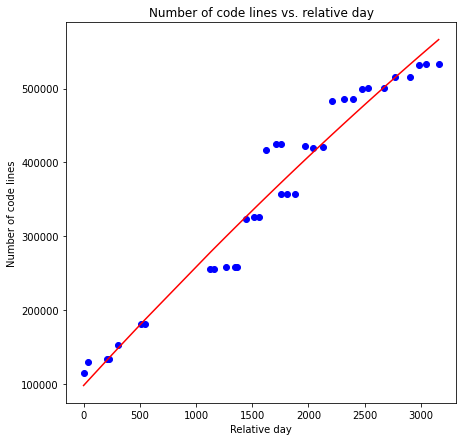

In [ ]:
# Build a basic regression model
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
#LinearRegressionModel = LinearRegression()
#LinearRegressionModel.fit(X,y)

X = df['relative_day'].values.reshape(-1,1)
y = df['nb_code'].values.reshape(-1,1)
polyreg.fit(X, y)


#plot the regression line
plt.figure(figsize=(7,7))
plt.scatter(X, y, color='blue')
plt.plot(X, polyreg.predict(X), color='red')
plt.xlabel('Relative day')
plt.ylabel('Number of code lines')
plt.title('Number of code lines vs. relative day')
plt.show()


In [ ]:
#forecast relative day 3044 and 3158, the ones that we dropped
print(f"Forecast for 4.4.1: {polyreg.predict([[3044]])}")
print(f"Forecast for 4.4.2: {polyreg.predict([[3158]])}")


Forecast for 4.4.1: [[531523.79796498]]
Forecast for 4.4.2: [[541307.44211962]]


Text(0, 0.5, 'Number of code lines')

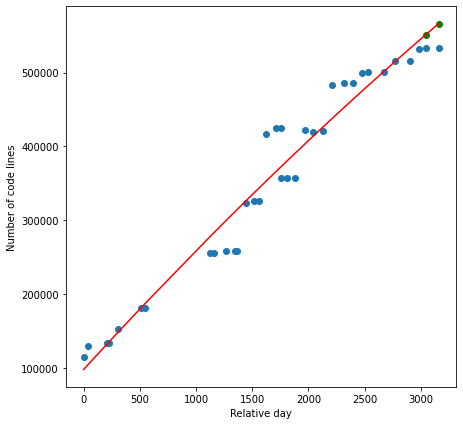

In [ ]:
#plot the original data and the forecasted data
plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X, polyreg.predict(X), color='red')
plt.scatter(3044, polyreg.predict([[3044]]), color='green')
plt.scatter(3158, polyreg.predict([[3158]]), color='green')
plt.xlabel('Relative day')
plt.ylabel('Number of code lines')


In [ ]:
#Compute R-squared error
from sklearn.metrics import r2_score

y_old_1 = 532915 #old value for 4.4.1
y_old_2 = 533292 #old value for 4.4.2
y_new_1 = polyreg.predict([[3044]]) #new value for 4.4.1
y_new_2 = polyreg.predict([[3158]]) #new value for 4.4.2

#Convert y_new to a integer
y_new_1 = int(y_new_1)
y_new_2 = int(y_new_2)

#print the y_old_1, y_old_2, y_new_1, y_new_2
print(f"y_old_1: {y_old_1}")
print(f"y_old_2: {y_old_2}")
print(f"y_new_1: {y_new_1}")
print(f"y_new_2: {y_new_2}")


#Compute the R-squared error between the old and new values
r2_score_old = r2_score([y_old_1, y_old_2], [y_new_1, y_new_2])
print(f"R-squared error: {r2_score_old:.3f}")

#Compute the mean squared error between the old and new values
from sklearn.metrics import mean_squared_error
mean_squared_error_old = mean_squared_error([y_old_1, y_old_2], [y_new_1, y_new_2])
mean_squared_error_old = np.sqrt(mean_squared_error_old)
print(f"Mean squared error: {mean_squared_error_old:.3f}")


y_old_1: 532915
y_old_2: 533292
y_new_1: 551411
y_new_2: 566326
R-squared error: -20168.665
Mean squared error: 26770.760


### Questions:
6. What is the polynomial degree that you adopted to build the model? Why? 

We choose a degree of 2 because it is the best fit for the data. 

7. What is the coefficient of determination? (R-squared)

The value whe obtained is a bit strange and we don't know why (-20168.665)

8. What is the Root mean square error for the forecasted values?

The value obtained is 26770.760

### Filtering on coding langugage

Consider the prominent langugages used in this software project and plot the distribution of their LOC in a pie chart for the first and the last versions

In [41]:
# Your code to get the data for LOC of first and last versions
def extract_all_loc(tags, add_code=True, add_comment=True, add_blank=True):
    df = []
    for i, tag in enumerate(tags):
        print(f'Processing {tag} ({i+1}/{len(tags)})', end='\r')
        # reset the repository to the specified tag

        command = f'git -C {project_path} reset --hard {tag}'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        # reset the repository to the specified tag
        command = f'git -C {project_path} tag -l --format="%(refname:short)|%(creatordate:short)" | sort -r' # to get the release date
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        
        release_date = list(line.strip().decode('utf-8') for line in process.stdout)
        for value in release_date:
            if value.startswith(tag):
                release_date = value.split('|')[1]
                break
        release_date = datetime.strptime(release_date, '%Y-%m-%d')
                
        command = f'cloc --json {project_path}'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        
        output = process.communicate()[0].decode('utf-8')
        
        value = {'release date': release_date, 'tag': tag}
        for key, data in json.loads(output).items():
            if 'code' in data:
                value[key] = 0
                if add_code:
                    value[key] += data['code']
                if add_comment:
                    value[key] += data['comment']
                if add_blank:
                    value[key] += data['blank']
        df.append(value)

    res = pd.DataFrame(df)
    return res.fillna(0)

In [42]:
df = extract_all_loc(major_minor_patch_versions)
df.head()


1 error:
Line count, exceeded timeout:  ../eucalyptus/net/globalnetwork.c


,release date,tag,Java,C,Bourne Shell,XML,Groovy,Web Services Description,C/C++ Header,Perl,...,Maven,JavaScript,Text,Python,XSLT,CSV,JSON,SVG,Markdown,YAML
0,2009-01-06,1.4,36867,13097,12311,6042,2522,1364,1160,565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-02-18,1.5.0,53674,16755,12319,8426,2825,1607,1240,1037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009-08-05,1.5.1,59401,17867,9244,8754,2971,1717,1288,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-08-17,1.5.2,46598,17940,9242,8827,2991,1719,1390,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009-11-05,1.6.1,79377,20778,13636,10127,6535,1722,2589,1978,...,1767.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


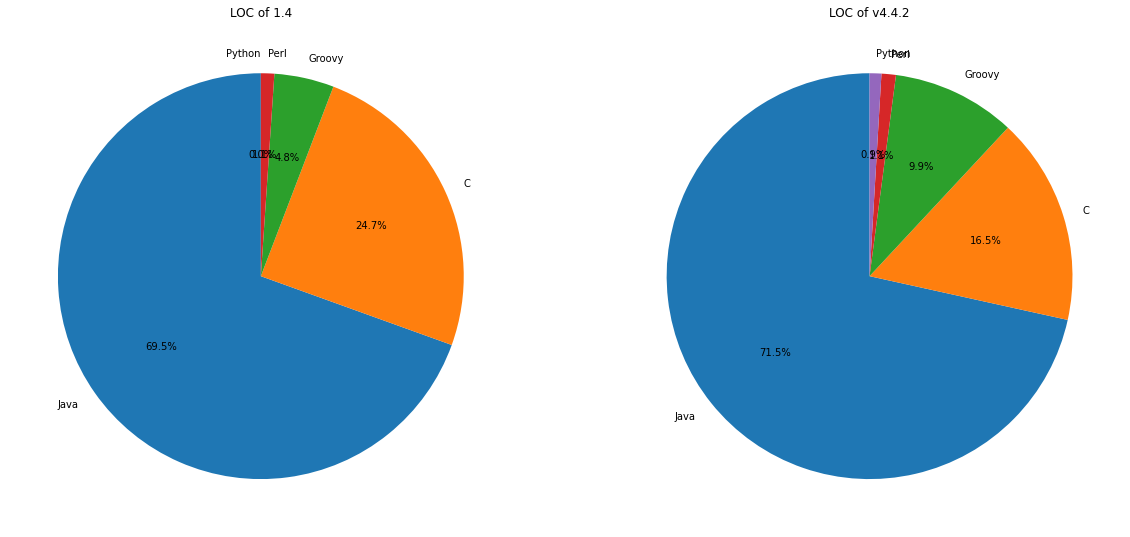

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
prominent_languages = ['Java', 'C', 'Groovy', 'Perl', 'Python']

for i, j in enumerate([0, len(df) - 1]):
    release_df = df.iloc[j][prominent_languages].fillna(0)
    release_df.sort_values(ascending=False, inplace=True)

    labels = release_df.keys()
    sizes = release_df.values

    axes[i].set_title(f'LOC of {df.iloc[j]["tag"]}')
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    
plt.show()

### Question:
9. Do you find any significant difference in the distribution of the language used in the software project between its first and the last version? If so, what is the difference and how much is it?

### Law of increasing growth for coding langugages

Get the LOC for each of the considered prominent langugages (as above) for each version of the form major.minor.patch  
1) Plot the date (x-axis) vs LOC (y-axis) 
2) Plot the date (x-axis) vs proportional LOC (y-axis). Proportional is LOC of a language/total number of LOC

In [43]:
prominent_languages_df = df.loc[:, ['release date'] + prominent_languages].fillna(0)

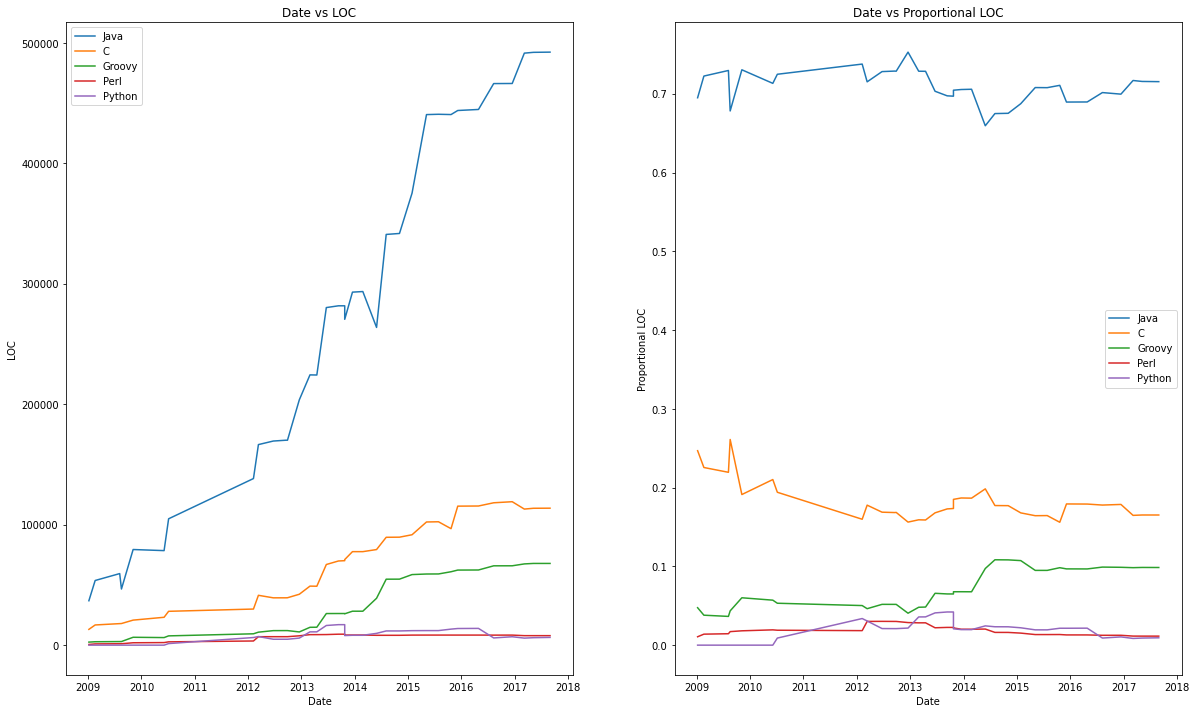

In [45]:
# Define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Plot 1: Date vs LOC
axes[0].set_title('Date vs LOC')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('LOC')
for language in prominent_languages:
    axes[0].plot(prominent_languages_df['release date'], prominent_languages_df[language], label=language)
axes[0].legend()

# Plot 2: Date vs Proportional LOC
axes[1].set_title('Date vs Proportional LOC')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Proportional LOC')

# Calculate proportional LOC for each language
proportional_loc = {}
for language in prominent_languages:
    proportional_loc[language] = prominent_languages_df[language] / prominent_languages_df[prominent_languages].sum(axis=1)
    
# Plot proportional LOC for each language
for language in prominent_languages:
    axes[1].plot(prominent_languages_df['release date'], proportional_loc[language], label=language)
axes[1].legend()

# Show the plot
plt.show() 


### Question:
10. Does the prominent languages considered by you obey laws of increasing growth?

Yes, the prominent languages considered by us obey the laws of increasing growth.

11. Does this software project obey the Law of Increasing Growth?

Yes, this software project obeys the Law of Increasing Growth like the prominent languages considered by us.

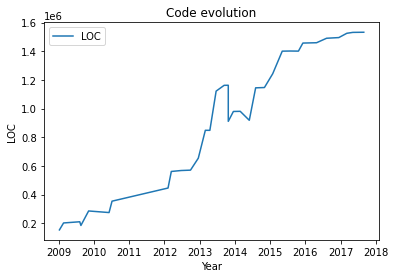

In [48]:
def plot_code_evolution(df):
    # calculate the sum of LOC for each row in the dataframe
    code_sum_df = df.drop(['release date', 'tag'], axis=1).fillna(0).sum(axis=1)

    # plot the code evolution over time
    plt.title('Code evolution')
    plt.xlabel('Year')
    plt.ylabel('LOC')
    plt.plot(df['release date'], code_sum_df, label='LOC')
    plt.legend()
    plt.show()

plot_code_evolution(df)



### Modify the CLOC parameters

1. Exclude all bank lines and verify if the Law of Increasing Growth still holds good for this filtering

In [49]:
without_blank_df = extract_all_loc(major_minor_patch_versions, add_blank=False)


Can't cd to (../eucalyptus/clc/modules/simpleworkflow/src/main/java/com/eucalyptus/simpleworkflow/) persist: No such file or directory
 at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5419.
Can't cd to (../eucalyptus/clc/modules/simpleworkflow/src/main/java/com/eucalyptus/simpleworkflow/) policy: No such file or directory
 at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5419.
Can't cd to (../eucalyptus/clc/modules/) simpleworkflow-common: No such file or directory
 at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5419.
Can't cd to (../eucalyptus/clc/modules/) tokens: No such file or directory
 at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5419.
Unable to read ../eucalyptus/devel/log2dot.sh
Unable to read ../eucalyptus/devel/mapIamQuotasToActions.groovy
Unable to read ../eucalyptus/devel/nc-log-gnuplot.pl
Unable to read ../eucalyptus/devel/populate_canonical_ids.groovy
Unable to read ../eucalyptus/devel/postgres_alises.sh
Unable to read ../eucalyptus/dev


1 error:
Line count, exceeded timeout:  ../eucalyptus/net/globalnetwork.c


In [ ]:
plot_code_evolution(without_blank_df)

2. Exclude all comment lines and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
without_comment_df = extract_all_loc(major_minor_patch_versions, add_comment=False)

In [ ]:
plot_code_evolution(without_comment_df)


3. Exclude all non-code files (or consider prominent coding langugages used in the project) and and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
only_code_df = extract_all_loc(major_minor_patch_versions, add_comment=False, add_blank=False)
only_prominent_code_df = only_code_df[['release date', 'tag'] + prominent_languages]

In [ ]:
plot_code_evolution(only_prominent_code_df)


### 2.3 Law of Continuing Change
1. Using CLOC tool, find the features such as number of lines of code that are added, modified, removed and same between two consecutive versions
2. Consider all the three component versions (major.minor.patch) - Dataset A
3. Consider only the minor versions (major.minor) - Dataset B
4. Having all the features in the same plot, create two plots (one for Dataset A and another for Dataset B) the outcomes with date on x-axis and the number on y-axis.
5. Make a subplot of all the features

Code hint:  
For each pair of tags, set the original project to the required tag and the copy of the original project to the next tag.  
To get the required data in json format - "command = f'CLOC/cloc --git --diff {first_project_path} {second_project_path} --json'"

In [58]:
eucalyptus_project_path = '../eucalyptus/' # your project path here
eucalyptus_copy_project_path = '../eucalyptus-copy/' # your path to the copy of your project here
#major_minor_patch_versions = 'v4.1.0' #set of version that you would like to consider for this analysis

In [61]:
def extract_for_tag(tags, language='Java'):
    df = []
    
    for i, current_tag in enumerate(tags[:-1]):
        next_tag = tags[i+1]
        print(f'Processing {current_tag} ({i+1}/{len(tags)})', end='\r')
        
        # Reset the project to the current tag
        command = f'git -C {eucalyptus_project_path} reset --hard {current_tag}'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        
        # Get the release date for the current tag
        command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)|%(creatordate:short)" | sort -r'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        
        release_date = None
        for line in process.stdout:
            line = line.strip().decode('utf-8')
            if line.startswith(current_tag):
                release_date = datetime.strptime(line.split('|')[1], '%Y-%m-%d')
                break
                
        # Reset the copy project to the next tag
        command = f'git -C {eucalyptus_copy_project_path} reset --hard {next_tag}'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)

        # Get the diff between the current and next tags using cloc
        command = f'cloc --git --diff {eucalyptus_project_path} {eucalyptus_copy_project_path} --json'
        process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
        diff = process.communicate()[0].decode('utf-8')
        
        # Parse the JSON output of cloc and add the relevant data to the DataFrame
        data = json.loads(diff)
        row = {'release date': release_date, 'current_tag': current_tag, 'next_tag': next_tag}
        for key, value in data.items():
            if language in value:
                loc = value[language]['code'] + value[language]['comment'] + value[language]['blank']
                row[key] = loc
                
        df.append(row)
    
    return pd.DataFrame(df)


In [62]:
dataset_A = extract_for_tag(major_minor_patch_versions)
dataset_A.head()

fatal: ambiguous argument 'v': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
fatal: cannot change to '../eucalyptus-copy/': No such file or directory
fatal: ambiguous argument '../eucalyptus-copy/': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
fatal: Not a valid object name ../eucalyptus-copy/
fatal: not a valid object name: ../eucalyptus-copy/
Failed to create tarfile of files from git. at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5246.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [57]:
dataset_B = extract_for_tag(major_minor_versions)
dataset_B.head()

fatal: cannot change to '../eucalyptus-copy/': No such file or directory
fatal: ambiguous argument '../eucalyptus-copy/': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'
fatal: Not a valid object name ../eucalyptus-copy/
fatal: not a valid object name: ../eucalyptus-copy/
Failed to create tarfile of files from git. at /opt/homebrew/Cellar/cloc/1.96/libexec/bin/cloc line 5246.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# Your plotting code here, different plot for each feature
fig,axes = plt.subplots(2,2)

### Questions:
1. Do you find the Law of Continuing Change holding good here? Prove it empirically.

2. Does the law of increasing growth too hold good here?

### Law of continuing change for coding languages
Consider the prominent languages used in this software project for versions of the form major.minor.patch
1. Obtain the number of lines of code that are added, modified, removed and same between two consecutive versions
2. Make plots for each parameter (added, modified, removed and same) with date on x-axis  
    a) y-axis number of lines of code   
    b) y-axis proportional number of lines of code (number of lines of code of that language/total number of lines of code) 

In [ ]:
# Your code here

In [ ]:
# Your plotting code here
fig,axes = plt.subplots(2,2)

### Question:
3. Does the law of continuing change obey here for all the considered prominent langugages? Comment on the rate of growth.  

4. Does this software project obey Law of Continuing Change?